## Homework 5: Linear Regression, Features and Regularization 
### Due Date: April 30 at 11:59 PM

Following our exploration of housing prices in Boston, Massachusetts, we want to study housing prices in Ames, Iowa. We will use linear regression to predict sale prices from features such as size, number of bathrooms and neighborhood. While we want to add many features into the model, we need to avoid overfitting the training set. So along the way, we will get experience with regularization. We will use Ridge Regression to shrink the weights. Since we need an extra parameter to control the amount of shrinking, we will use validation to guess-and-check different values for the extra parameter. By completing Homework 5, you should get...

- Practice reasoning about features for linear regression particularly polynomial features

- Intuition about regularization particularly Ridge Regression  

- Understanding of feature normalization to prevent against differ scales between features

We will guide you through some exploratory data analysis, laying out an approach to selecting features for the model. After incorporating the features, we will fit a Ridge Regression model to predict housing prices. Finally we will analyze the error of the model. Along the way, we will try to pull together reusable code for each step. 

We encourage you to think about ways to improve the model's performance with your classmates. If you are interested in try out your ideas, then you could take part in a related [modeling competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file', embed = True)` to embed it.
- You should not display large output cells such as all rows of a table. 

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.
**Collaborators:** *list names here*

**Name:** Richie Doherty

**NetId:** rd2414

**Collaborators:** MAdi Perez

### Rubric

Question | Points
--- | ---
Gradescope | 2
[Question 1](#q1) | 3
[Question 2](#q2) | 4
[Question 3](#q3) | 2
[Question 4a](#q4) | 2
[Question 4b](#q4) | 2
[Question 5](#q5) | 2
[Question 6](#q6) | 2
[Question 7](#q7) | 2
[Question 8a](#q8a) | 2
[Question 8b](#q8b) | 2
[Question 8c](#q8c) | 2
Total | 27

In [1]:
# Import some packages for data science
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

import dsua_112_utils

# Modify some settings

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

np.random.seed(47)

# Import some packages to help with configuration
import os, sys
from IPython.display import Image


In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()
assert 'dsua_112_utils' in sys.modules and "Ridge" in locals()

### Question 0 : Accessing the Data

The [Ames dataset](http://jse.amstat.org/v19n3/decock.pdf) consists of 2928 records taken from the Assessor’s Office in Ames, Iowa. The records describe individual residential properties sold in Ames, Iowa from 2006 to 2010. 

The data set has 82 features in total

- 46 Qualitative Variables
 * 23 nominal
 * 23 ordinal
- 34 Quantitative Variables
 * 14 discrete 
 * 20 continuous variables 

along with 2 additional identifiers. Please see `description_of_features.txt` for an explanation of each feature. 

In [3]:
assignment_path = "{home}/shared/HW5".format(home = os.environ["HOME"])

training_data = pd.read_csv(f"{assignment_path}/hw5_training.csv")
testing_data = pd.read_csv(f"{assignment_path}/hw5_testing.csv")

We split the data into

- training set with 1998 records 
- test set with 930 records 

We shold verify that the data shape matches the description.

In [4]:
# TEST 

# 2000 observations and 82 features in training data
assert training_data.shape == (1998, 82)

# 930 observations and 81 features in test data
assert testing_data.shape == (930, 82)

# training and testing should have the same columns
assert len(np.intersect1d(testing_data.columns.values, 
                          training_data.columns.values)) == 82

 The Ames data set contains information that typical homebuyers would want to know.  A more detailed description of each variable is included in `description_of_features.txt`. You should take some time to familiarize yourself with some of the features.

In [5]:
# RUN

training_data.columns.values

array(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage',
       'Lot_Area', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod/Add',
       'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd',
       'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond',
       'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', '1st_Flr_SF', '2nd_Flr_SF',
       'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',

### Exploratory Data Analysis

We will generate a couple visualizations to understand the relationship between `SalePrice` and other features. Note that we will examine the training data so that information from the testing data does not influence our modeling decisions. Looking at the testing data introduces [bias](https://en.wikipedia.org/wiki/Data_dredging) into the model.

#### Question 1 : Summarizing the Data  <a name="q1"></a>
We generate a [raincloud plot](https://micahallen.org/2018/03/15/introducing-raincloud-plots/amp/?__twitter_impression=true) of `SalePrice`. Here we combine a histogram with density, a scatter-plot, and a box plot.  

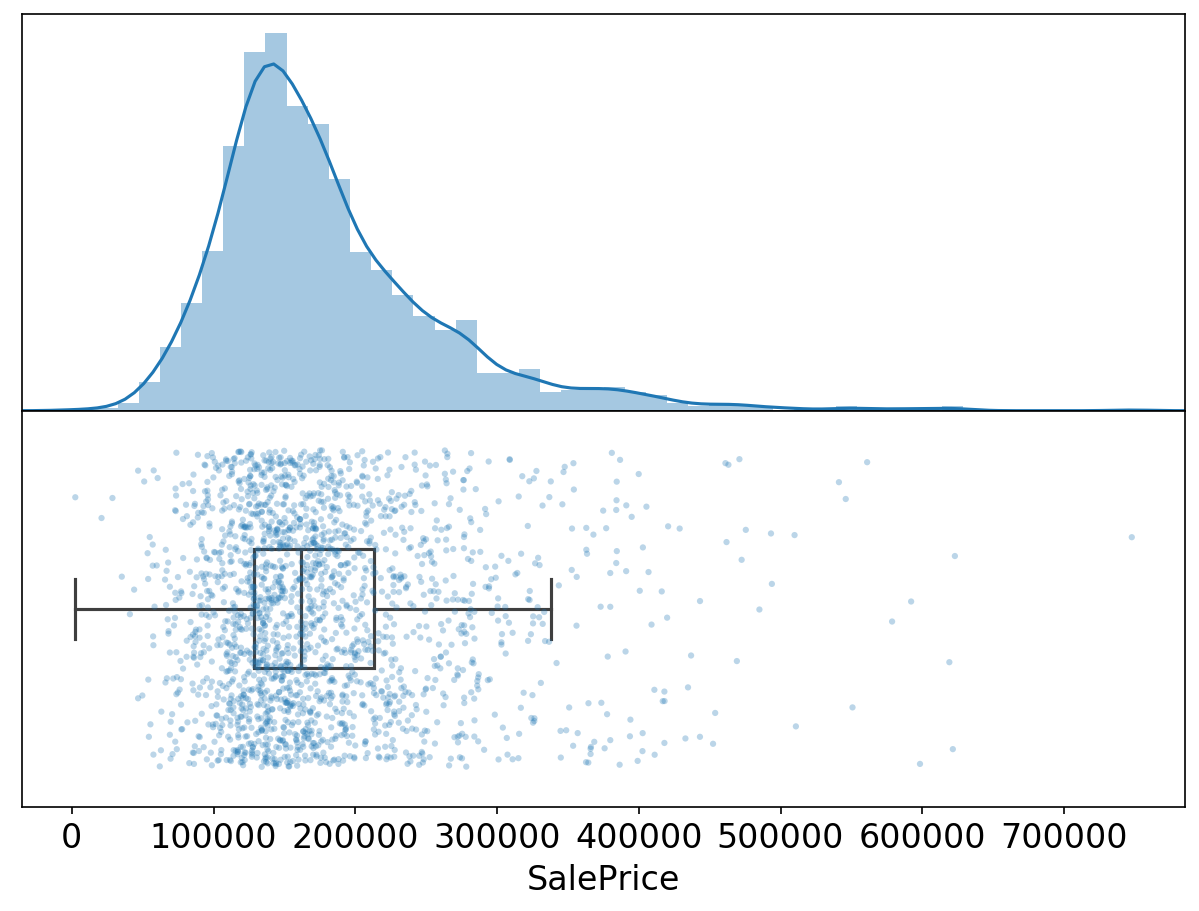

In [6]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    training_data['SalePrice'], 
    ax=axs[0]
)
sns.stripplot(
    training_data['SalePrice'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    training_data['SalePrice'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(training_data['SalePrice']) * 0.05
xmin = np.min(training_data['SalePrice']) - spacer
xmax = np.max(training_data['SalePrice']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

Having visualized the data, we should try to summarize it with statistics like the mean. 

In [7]:
training_data['SalePrice'].describe()

count      1998.000000
mean     180785.107608
std       81619.690690
min        2489.000000
25%      128600.000000
50%      162000.000000
75%      213175.000000
max      747800.000000
Name: SalePrice, dtype: float64

To check your understanding of the graph and summary statistics above, answer the following `True` or `False` questions:

1. The distribution of `SalePrice` in the training set is skewed to the left. In other words, most of the data clusters to the right.
1. The mean of `SalePrice` in the training set is greater than the median.
1. At least 25% of the houses in the training set sold for more than \$200,000.00.

In [8]:
q1statement1 = False
q1statement2 = True
q1statement3 = False

# YOUR CODE HERE
#raise NotImplementedError()

In [9]:
# TEST
assert set([q1statement1]).issubset({False, True})


In [10]:
# TEST

assert set([q1statement2]).issubset({False, True})


In [11]:
# TEST

assert set([q1statement3]).issubset({False, True})


### Data Processing

#### Question 2 : Number of Bathrooms  <a name="q2"></a>

We know that Total Bathrooms can be calculated as:

$$ \text{TotalBathrooms}=(\text{BsmtFullBath} + \text{FullBath}) + \dfrac{1}{2}(\text{BsmtHalfBath} + \text{HalfBath})$$

Write a function `add_total_bathrooms(data)` that returns a copy of `data` with an additional column called `TotalBathrooms` computed by the formula above.  Please avoid loops.

In [12]:
def add_total_bathrooms(data):
    """
    Input:
        data: a table containing at least four columns of numbers 
            Bsmt_Full_Bath, Full_Bath, Bsmt_Half_Bath, and Half_Bath
            
    Output: 
        Copy of the table with additional column TotalBathrooms   
    """
    
    # make a copy
    with_bathrooms = data.copy()
    
    
    # fill missing values with 0 
    bath_vars = ['Bsmt_Full_Bath', 'Full_Bath', 'Bsmt_Half_Bath', 'Half_Bath']
    with_bathrooms = with_bathrooms.fillna({var: 0 for var in bath_vars})
    
    # add the TotalBathrooms column
    weights = np.array([1, 1, 0.5, 0.5])
    with_bathrooms["TotalBathrooms"] = sum([with_bathrooms['Bsmt_Full_Bath'] * weights[0],
                                           with_bathrooms['Full_Bath'] * weights[1],
                                           with_bathrooms['Bsmt_Half_Bath'] * weights[2],
                                           with_bathrooms['Half_Bath'] * weights[3]]
                                          )
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return with_bathrooms

training_data = add_total_bathrooms(training_data)

In [13]:
# TEST

assert not training_data['TotalBathrooms'].isnull().any() 


Using `sns.boxplot` to generate side-by-side boxplots showing the range of prices for different numbers of bathrooms. Take 

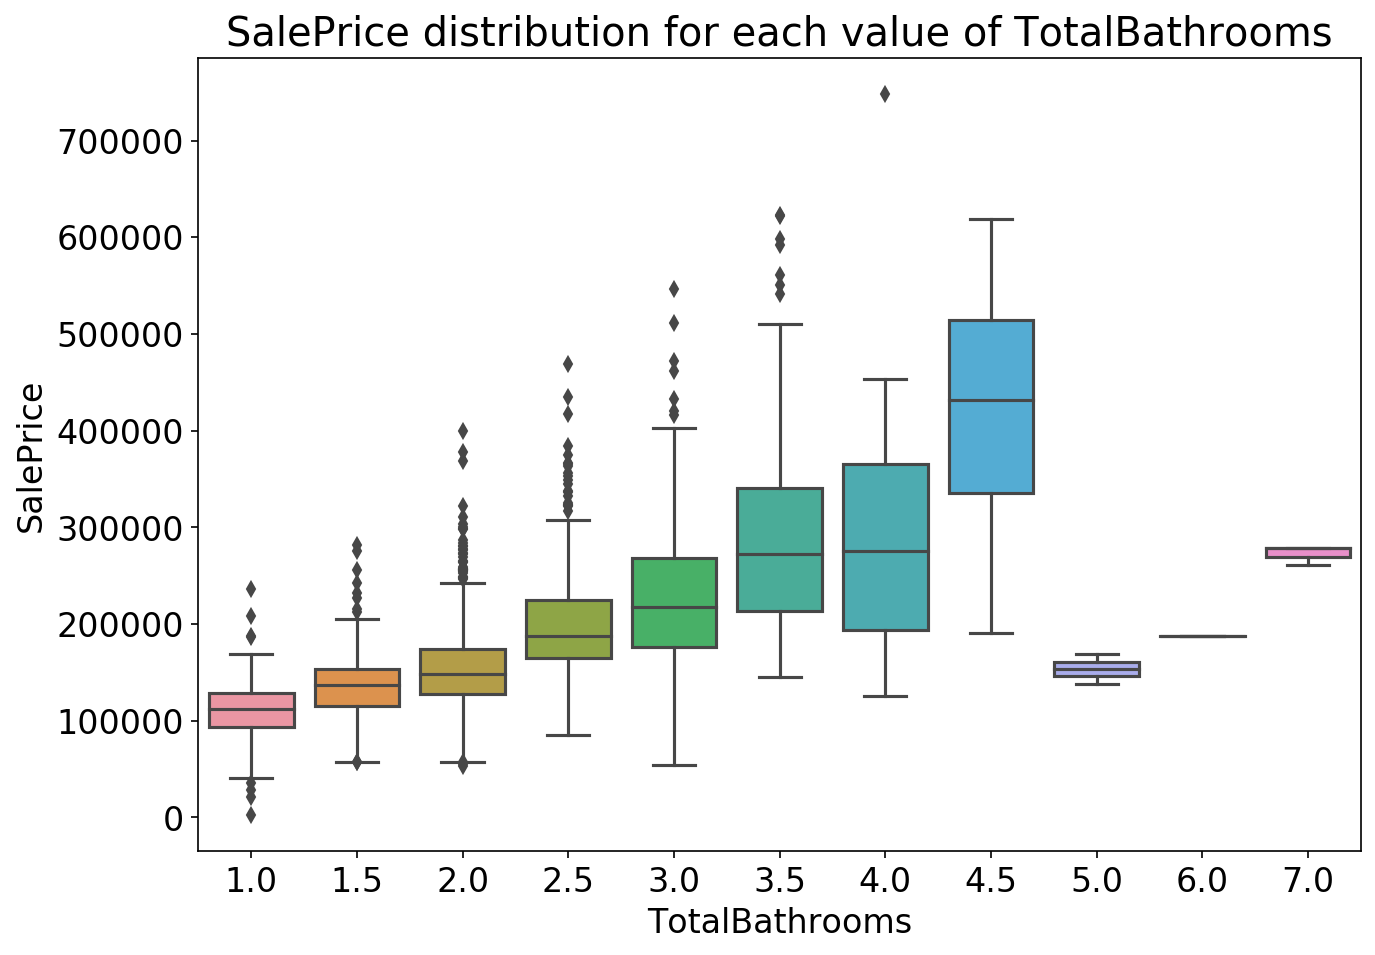

In [14]:
x = 'TotalBathrooms'
y = 'SalePrice'
data = training_data

sns.boxplot(x=x, y=y, data = data)
# YOUR CODE HERE
#raise NotImplementedError()

plt.title('SalePrice distribution for each value of TotalBathrooms');

To check your understanding of the chart, answer the following `True` or `False` questions:

1. Based on the trend in the chart, we should take houses with 5, 6, or 7 bathrooms to be outliers? 
1. We find a positive correlation between price and number of bathrooms for houses with 1 to 4.5 bathrooms?


In [15]:
q2statement1 = False
q2statement2 = True

# YOUR CODE HERE
#raise NotImplementedError()

In [16]:
# TEST

assert set([q2statement1]).issubset({False, True})


In [17]:
# TEST

assert set([q2statement2]).issubset({False, True})


### Encoding Features

We will create new features out of old features through transformations.


#### Question 3 : Size of House and Garage <a name="q3"></a>

We can visualize the association between `SalePrice` and `Gr_Liv_Area`.  The `description_of_features.txt` file tells us that `Gr_Liv_Area` measures "above grade (ground) living area square feet." This variable represents the square footage of the house excluding anything underground.  

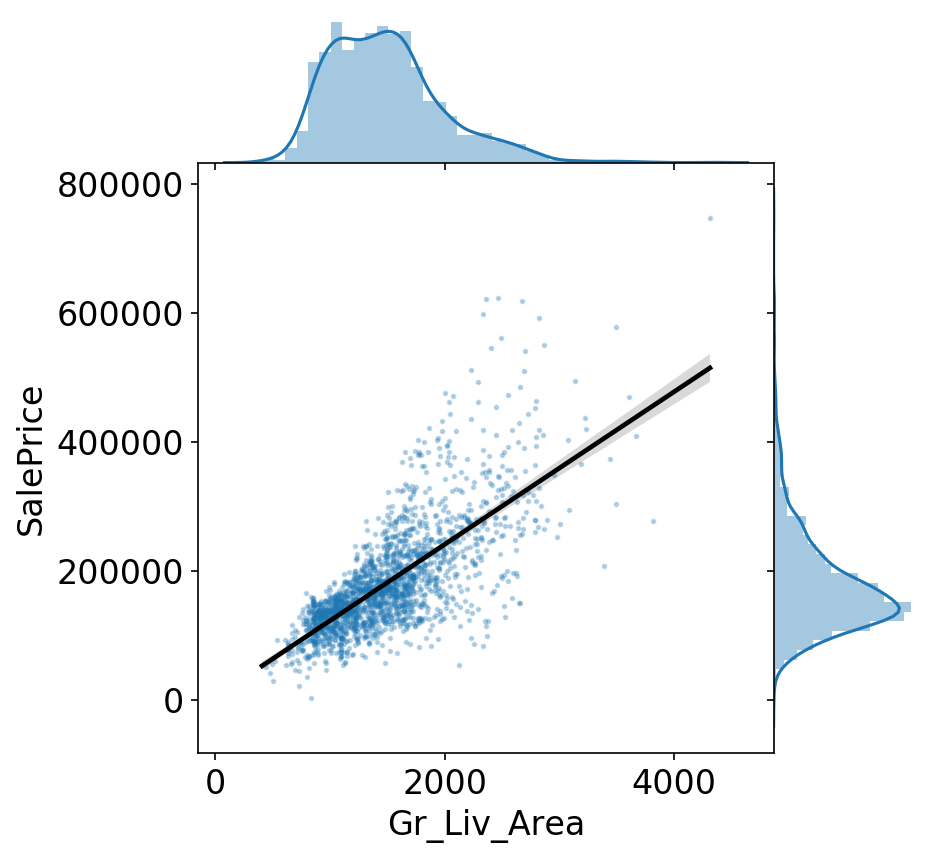

In [18]:
sns.jointplot(
    x='Gr_Liv_Area', 
    y='SalePrice', 
    data=training_data,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

Since `Gr_Liv_Area` excludes the garage space, we visualize the association between `SalePrice` and `Garage_Area`.  The `codebook.txt` file tells us that `Gr_Liv_Area` measures "Size of garage in square feet." 

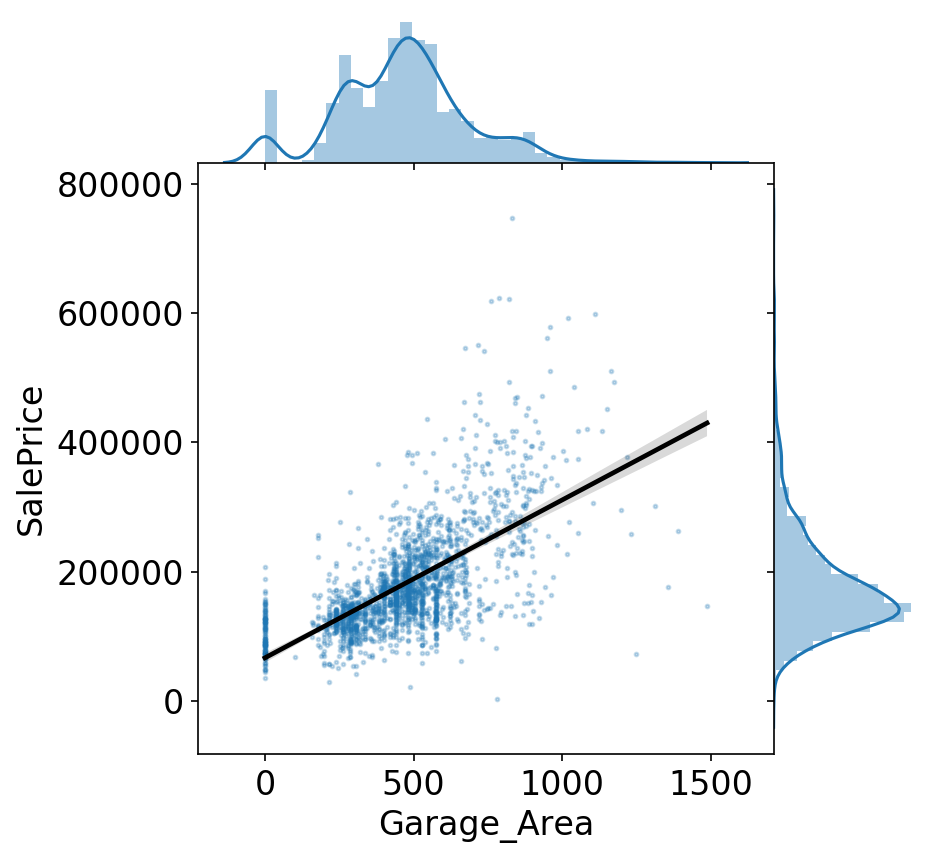

In [19]:
sns.jointplot(
    x='Garage_Area', 
    y='SalePrice', 
    data=training_data,
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

Write a function called `add_power` that inputs
 - a table `data`
 - a column name `column_name` of the table 
 - positive integer `degree`

and outputs 

 - a copy of `data` with an additional column called `column_name<degree>` (without the angle brackets) containing all entries of `column_name` raised to power `degree`.  For instance, `add_power(training_data, "Garage_Area", 2)` should add a new column named `Garage_Area2`.

In [20]:
def add_power(data, column_name, degree):
    """
    Input:
      data : a table containing column called column_name
      column_name : a string indicating a column in the table
      degree: positive integer 

    Output: 
      copy of data containing a column called column_name<degree> with entries of column_name to power degree
    """
    with_power = data.copy()
    
    new_column_name = column_name + str(degree)
    new_column_values = with_power[column_name]**(degree)
    
    with_power[new_column_name] = new_column_values
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return with_power

training_data = add_power(training_data, "Garage_Area", 2)
training_data = add_power(training_data, "Gr_Liv_Area", 2)



Among `Gr_Liv_Area`, `Gr_Liv_Area2`, `Garage_Area`, `Garage_Area2` which has the largest correlation with `SalePrice`? Remember to use the function `corr` to compute correlations.

In [21]:
training_data[["Gr_Liv_Area", "Gr_Liv_Area2", "Garage_Area", "Garage_Area2", "SalePrice"]].corr()

,Gr_Liv_Area,Gr_Liv_Area2,Garage_Area,Garage_Area2,SalePrice
Gr_Liv_Area,1.000000,0.974920,0.483244,0.476959,0.723240
Gr_Liv_Area2,0.974920,1.000000,0.455810,0.465355,0.711603
Garage_Area,0.483244,0.455810,1.000000,0.937713,0.649518
Garage_Area2,0.476959,0.465355,0.937713,1.000000,0.639014
SalePrice,0.723240,0.711603,0.649518,0.639014,1.000000


In [22]:
highest_variable = "Gr_Liv_Area"

# YOUR CODE HERE
#raise NotImplementedError()

In [23]:
# TEST

assert highest_variable in ['Gr_Liv_Area', 'Gr_Liv_Area2', 'Garage_Area', 'Garage_Area2']


#### Question 4 : Neighborhood <a name="q4"></a>




Let's take a look at the relationship between neighborhood and sale prices of the houses in our data set.

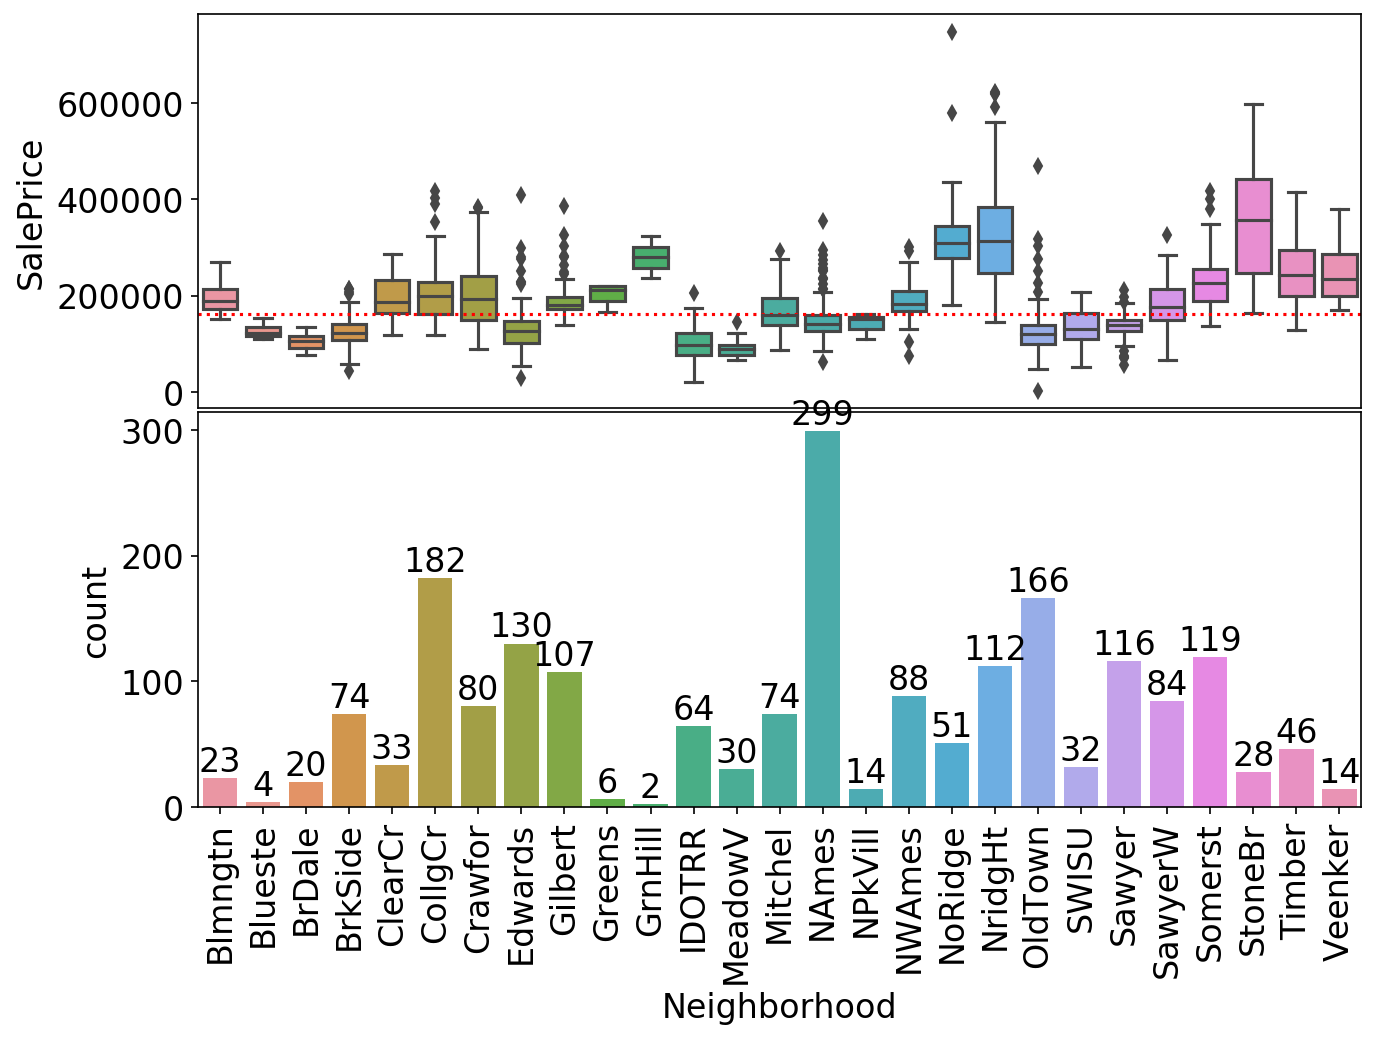

In [24]:
fig, axs = plt.subplots(nrows=2)

sns.boxplot(
    x='Neighborhood',
    y='SalePrice',
    data=training_data.sort_values('Neighborhood'),
    ax=axs[0]
)

sns.countplot(
    x='Neighborhood',
    data=training_data.sort_values('Neighborhood'),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y=training_data['SalePrice'].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)

We find a lot of variation in prices across neighborhoods. Moreover, the amount of data available is not uniformly distributed among neighborhoods.  North Ames, for example, comprises almost 15% of the training data while Green Hill has only 2 observations in this data set.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together.  Let's categorize our neighborhoods in a crude way: we'll take the top 3 neighborhoods measured by median `SalePrice` and identify them as "expensive neighborhoods"; the other neighborhoods are not marked.

#### Question 4a : Determining Expensive Neighborhoods <a name="q4b"></a> 
Write a function that returns a list of the top `n` neighborhoods by `SalePrice` as measured by our choice of aggregating function.  For example, in the setup above, we would want to call `find_expensive_neighborhoods(training_data, 3, np.median)` to find the top 3 neighborhoods measured by median `SalePrice`.

In [25]:
def find_expensive_neighborhoods(data, n, summary_statistic):
    """
    Input:
      data : table containing at a column Neighborhood and a column SalePrice 
      n : integer indicating the number of neighborhood to return
      summary_statistic : function used for aggregating the data in each neighborhood.
    
    Output:
      a list of the top n richest neighborhoods as measured by the summary statistic
    """
    
    neighborhoods = (training_data.groupby("Neighborhood")
                                  .agg({"SalePrice" : summary_statistic})
                                  .sort_values("SalePrice", ascending = False)
                                  .index[:n])
    
    return list(neighborhoods)

For example, if we want to find the top 5 neighborhoods in terms of average price, then we would could use `find_expensive_neighborhoods`.

In [26]:
find_expensive_neighborhoods(training_data, 5, np.mean)

['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Timber']

Use `find_expensive_neighborhoods` to determine the top 3 neighborhoods in terms of median price. 

In [27]:
three = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhood_1 = three[0]
expensive_neighborhood_2 = three[1]
expensive_neighborhood_3 = three[2]
three
# YOUR CODE HERE
#raise NotImplementedError()

['StoneBr', 'NridgHt', 'NoRidge']

In [28]:
# TEST

expensive_neighborhoods = [expensive_neighborhood_1, expensive_neighborhood_2, expensive_neighborhood_3]

assert set(expensive_neighborhoods).issubset(training_data['Neighborhood'].unique())


#### Question 4b : Updating the Table <a name="q4b"></a> 

We now have a list of three expensive neighborhoods from Question 4a. We want to add a feature `in_expensive_neighborhood` to the training set.  

Write a function `add_expensive_neighborhood` that adds a column `in_expensive_neighborhood` to the table. The values should be 0 or 1. 

- if the house is in an `expensive_neighborhoods` then the value is 1
- if the house is not in an `expensive_neighborhoods` then the value is 0

Instead of loops, try to use the pandas function `isin`.

In [29]:
def add_expensive_neighborhood(data, neighborhoods):
    """
    Input:
      data : a table containing a 'Neighborhood' column 
      neighborhoods : list of strings with names of neighborhoods
    Output:
      A copy of the table with an additional column in_expensive_neighborhood
    """
    with_additional_column = data.copy()
    
    with_additional_column['in_expensive_neighborhood'] = data["Neighborhood"].isin(neighborhoods)
    with_additional_column.replace({'in_expensive_neighborhood': {True:1, False:0}})

    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return with_additional_column


Using the neighborhoods `expensive_neighborhoods` from Question 4a, we will add a column to the training set.

In [30]:
training_data = add_expensive_neighborhood(training_data, expensive_neighborhoods)

In [31]:
# TEST

assert sum(training_data.loc[:, 'in_expensive_neighborhood']) ==  191
assert sum(training_data.loc[:, 'in_expensive_neighborhood'].isnull()) == 0


### Modeling

We can use the features from Question 2, Question 3, and Question 4 to determine a model. 

#### Question 5 <a name="q5"></a> 

Remember that we need to normalize features for regularization. If the features have different scales, then regularization will unduly shrink the weights for features with smaller scales.

For example, if we want to normalize the features `Garage_Area` and `Gr_Liv_Area` then we could use the following approach.


In [32]:
Z = training_data[['Garage_Area','Gr_Liv_Area']].values

Z_normalized = (Z - Z.mean(axis = 0)) / Z.std(axis = 0)

Following the transformation, each column has mean 0 and standard deviation 1.

Write a function called `normalize` that inputs either a 1 dimensional array or a 2 dimensional array `Z` of numbers and outputs a copy of `Z` where the columns have been transformed to have mean 0 and standard deviation 1.

To avoid dividing by a small number, you could add 0.00001 to the standard deviation in the denominator.  

In [33]:
def standardize(Z):
    """
    Input:
       Z: 1 dimensional or 2 dimensional array 
    Outuput
       copy of Z with columns having mean 0 and variance 1
    """
    Z_normalized = (Z - Z.mean(axis = 0))/ (Z.std(axis = 0) + .00001)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return Z_normalized 

In [34]:
# TEST 

Z = training_data[['Garage_Area','Gr_Liv_Area']].values

assert np.all(np.isclose(standardize(Z).mean(axis = 0), [0,0]))


#### Question 6 : Validation Set <a name="q6"></a>

Let's split the training set into a training set and a validation set. We will use the training set to fit our model's parameters. We will use the validation set to estimate how well our model will perform on unseen data. If we used all the data to fit our model, we would not have a way to estimate model performance on unseen data.

In [35]:
# Run to make a copy of the original training set

training_data_copy = pd.read_csv(f"{assignment_path}/hw5_training.csv")

We will split the data in `training_data_copy` into two tables named `training_data` and `validating_data`. 

First we need to shuffle the indices of the table. Note that the training set has 1998 rows. We want to generate an array containing the number 0,1,...,1997 in random order.

In [36]:
length_of_training_data = len(training_data_copy)

RANDOM_STATE = 47

shuffled_indices = np.random.RandomState(seed=RANDOM_STATE).permutation(length_of_training_data)

Note that we set a seed to allow for reproducible random numbers. See Lab 12 for more information about random numbers.

Second, we want to split the indices into two pieces

- `train_indices` containing 80% of the shuffled indices 
- `validate_indices` containing 20% of the shuffled indices

Here we want to leave 20% of the data for validation.

In [37]:
train_indices = shuffled_indices[:int(length_of_training_data * 0.8)] 
validate_indices = shuffled_indices[int(length_of_training_data * 0.8):] 

Third we use the indices `training_data` and `validating_data` to access the corresponding rows in `training_data_copy` to generate the training set and validation set. Try to use `iloc` to access the rows.


In [38]:
training_data = training_data_copy.iloc[train_indices]
validating_data = training_data_copy.iloc[validate_indices,:]

# YOUR CODE HERE
#raise NotImplementedError()

In [39]:
# TEST

assert training_data.shape == (1598, 82)
assert validating_data.shape == (400, 82) 
assert np.intersect1d(train_indices, validate_indices).size == 0 


### Reusable Pipeline

We want to try a couple different models. For each model, we will have to process the data. By chaining the transformations together, we can repeatedly fit models to data. We write a function called `process_data` that combines the transformation from 

- Question 2 : calculate total number of bathrooms 
- Question 3 : add square of `Gr_Liv_Area` and `Garage_Area`
- Question 4 : indicate expensive neighborhoods
- Question 5: standardize the columns

We use the `pandas` function pipe to chain together these transformations in order.

In [40]:
def select_columns(data, columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data(data):
    """Process the data for a guided model."""
    
    nghds = find_expensive_neighborhoods(data, n=3, summary_statistic=np.median)
    
    data = ( data.pipe(add_total_bathrooms)
                 .pipe(add_power,'Gr_Liv_Area', 2)
                 .pipe(add_power,'Garage_Area', 2)
                 .pipe(add_expensive_neighborhood, nghds)
                 .pipe(select_columns, ['SalePrice', 
                                          'Gr_Liv_Area', 
                                          'Garage_Area',
                                          'Gr_Liv_Area2', 
                                          'Garage_Area2',
                                          'TotalBathrooms',
                                          'in_expensive_neighborhood']) )
    
    
    data.dropna(inplace = True)
    X = data.drop(['SalePrice'], axis = 1)
    X = standardize(X)
    y = data.loc[:, 'SalePrice']
    y = standardize(y)
    
    return X, y

Note that we split our data into a table of explantory variables `X` and an array of response variables `y`.

We can use `process_data` to transform the training set and validation set from Question 5 along with the testing set from Question 0.

In [41]:
X_train, y_train = process_data(training_data)
X_validate, y_validate = process_data(validating_data)
X_test, y_test = process_data(testing_data)

### Fitting the Model

We are ready to fit a model.  The model we will fit can be written as follows:

$$\begin{align*}
\text{SalePrice} = \theta_1 \cdot \text{Gr_Liv_Area} + \theta_2 \cdot \text{Gr_Liv_Area2} \\ + \theta_3 \cdot \text{Garage_Area} + \theta_4 \cdot \text{Garage_Area2} \\ + \theta_5 \cdot \text{is_in_expensive_neighborhood} \\ + \theta_6 \cdot \text{TotalBathrooms}
\end{align*}
$$

Here `Gr_Liv_Area`, `Gr_Liv_Area2`, `Garage_Area`, and `Garage_Area2` are continuous variables and `is_in_rich_neighborhood` and `TotalBathrooms` are discrete variables. While  `is_in_expensive_neighborhood` is a one-hot encoding of categories, `TotalBathrooms` can be understsood as a number.

#### Question 7 : Ridge Regression <a name="q7"></a>

We will use a [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to implement Ridge Regression. Note that `alpha` is the extra parameter needed to specify the emphasis on regularization. Large values of `alpha` mean greater emphasis on regularization. 



In [42]:
ridge_regression_model = Ridge(alpha = 1)

ridge_regression_model.fit(X_train, y_train)

ridge_regression_model.coef_

array([0.16538741, 0.2232974 , 0.19213362, 0.04181557, 0.22455396,
       0.27288839])

We want to try many different values for the extra parameter. Some values will give better models than other values. 

In [43]:
models = dict()
alphas = np.logspace(-4,4,10)

for alpha in alphas: 
    ridge_regression_model = Ridge(alpha = alpha)
    models[alpha] = ridge_regression_model

We have generated a dictionary called `models` with 
- key : the value of the extra parameter `alpha`
- value : a model for Ridge regression with the corresponding `alpha`

Fit each of the models to the training data `X_train`, `y_train`.

In [44]:
for alpha, model in models.items():
    model.fit(X_train, y_train)
    # YOUR CODE HERE
    #raise NotImplementedError()

In [45]:
# TEST 

assert all([len(model.coef_) == 6 for model in models.values()])


We can plot the slopes determined from the data for each value of `alpha`.

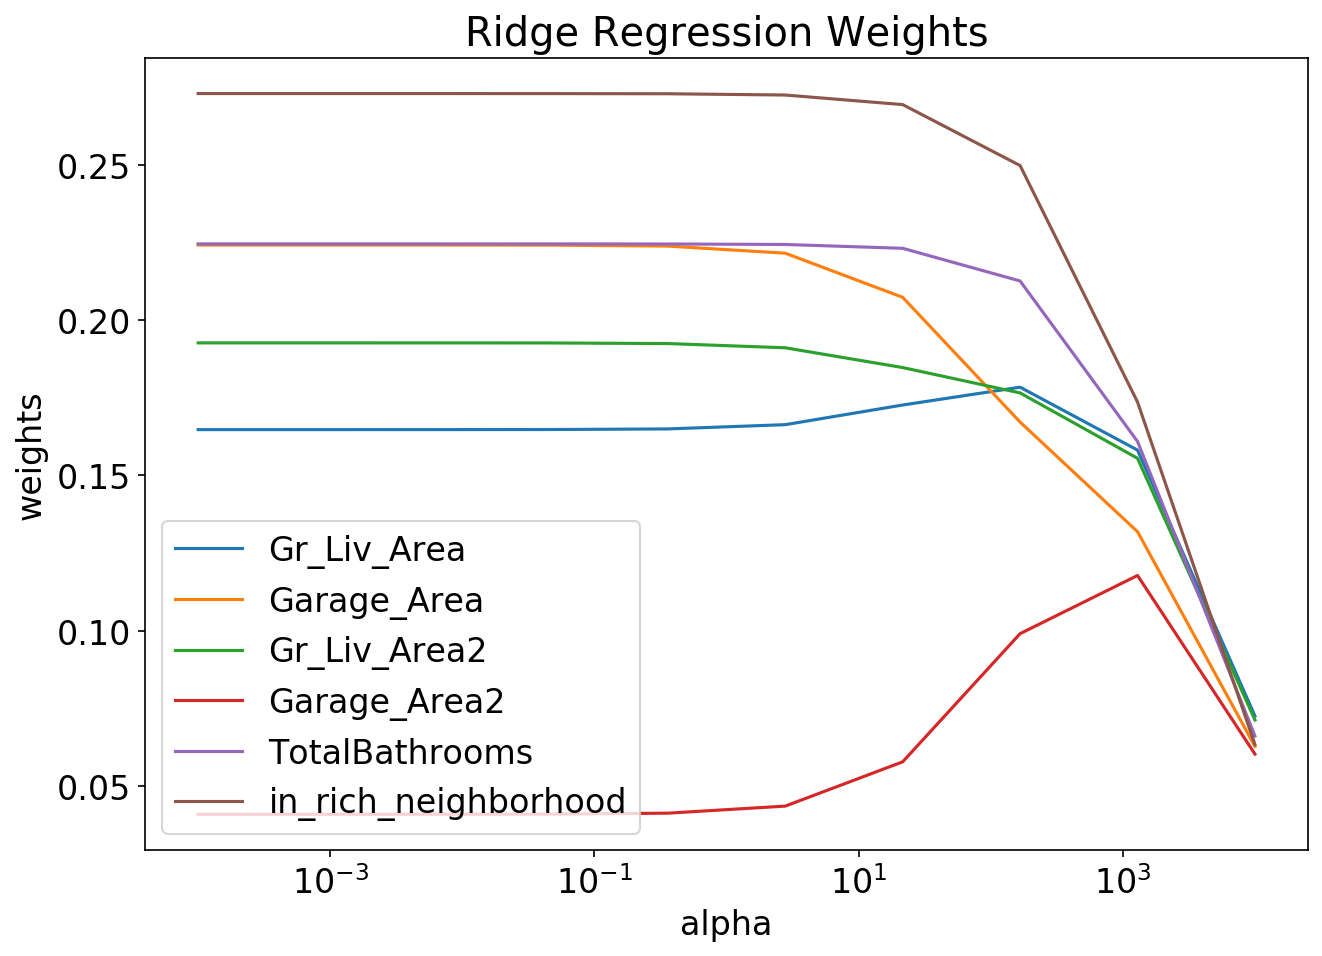

In [46]:
labels =   ['Gr_Liv_Area', 
            'Garage_Area',
            'Gr_Liv_Area2', 
            'Garage_Area2',
            'TotalBathrooms',
            'in_rich_neighborhood']

coefs = []
for alpha, model in models.items():
    coefs.append(model.coef_)

coefs = zip(*coefs)

fig, ax = plt.subplots(ncols=1, nrows=1)

for coef, label in zip(coefs, labels):
    plt.plot(alphas, coef, label = label)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regression Weights')
plt.legend();

### Evaluating the Model

Is our linear model any good at predicting house prices? Let's measure the quality of our model by calculating the Mean Square Error between our predicted house prices and the observed prices.

$$\text{MSE} = \dfrac{\sum_{\text{houses in test set}}(\text{actual price of house} - \text{predicted price of house})^2}{\text{# of houses in data set}}$$

Here we have a function called `mse` that calculates the error.

In [47]:
# RUN

def mse(observed, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      observed (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((observed - predicted)**2)) 

#### Question 8a : Mean Square Error <a name="q8a"></a>

For each `alpha`, we use `mse` to calculate the training error and validating error. 

In [48]:
mse_training = dict()
mse_validating = dict()

for alpha, model in models.items():
    y_predict = model.predict(X_train)
    mse_training[alpha] = mse(y_predict, y_train)

    y_predict = model.predict(X_validate)
    mse_validating[alpha] = mse(y_predict, y_validate)

We store the calculations in dictionaries `mse_training` and `mse_validating`. Here 

- key : a value for the extra parameter `alpha`
- value : mean square error of the corresponding model 

Which value of `alpha` has the smallest mean square error on the training set?

In [49]:
key_max = max(mse_training.keys(), key=(lambda k: mse_training[k]))
key_min = min(mse_training.keys(), key=(lambda k: mse_training[k]))

alpha_training_min = key_min
key_min
# YOUR CODE HERE
#raise NotImplementedError()

0.0001

In [50]:
# TEST 
assert alpha_training_min in alphas



Which value of `alpha` has the smallest mean square error on the validation set?

In [51]:
key_max = max(mse_validating.keys(), key=(lambda k: mse_validating[k]))
key_min = min(mse_validating.keys(), key=(lambda k: mse_validating[k]))
alpha_validating_min = key_min
key_min
# YOUR CODE HERE
#raise NotImplementedError()

0.0001

In [52]:
# TEST 
assert alpha_validating_min in alphas


#### Question 8b <a name="q8b"></a>

Using the `alpha` from Question 8a with the smallest mean square error on the validating set, predict `SalePrice` on the testing set. For the prediction, you can use the corresponding model fit to the data from Question 7.

In [53]:
model = models[alpha_validating_min]

y_predict = model.predict(X_test)


# YOUR CODE HERE
#raise NotImplementedError()

One way of understanding the appropriateness of a model is through a residual plot. Run the cell below to plot the actual sale prices against the residuals of the model for the test data.

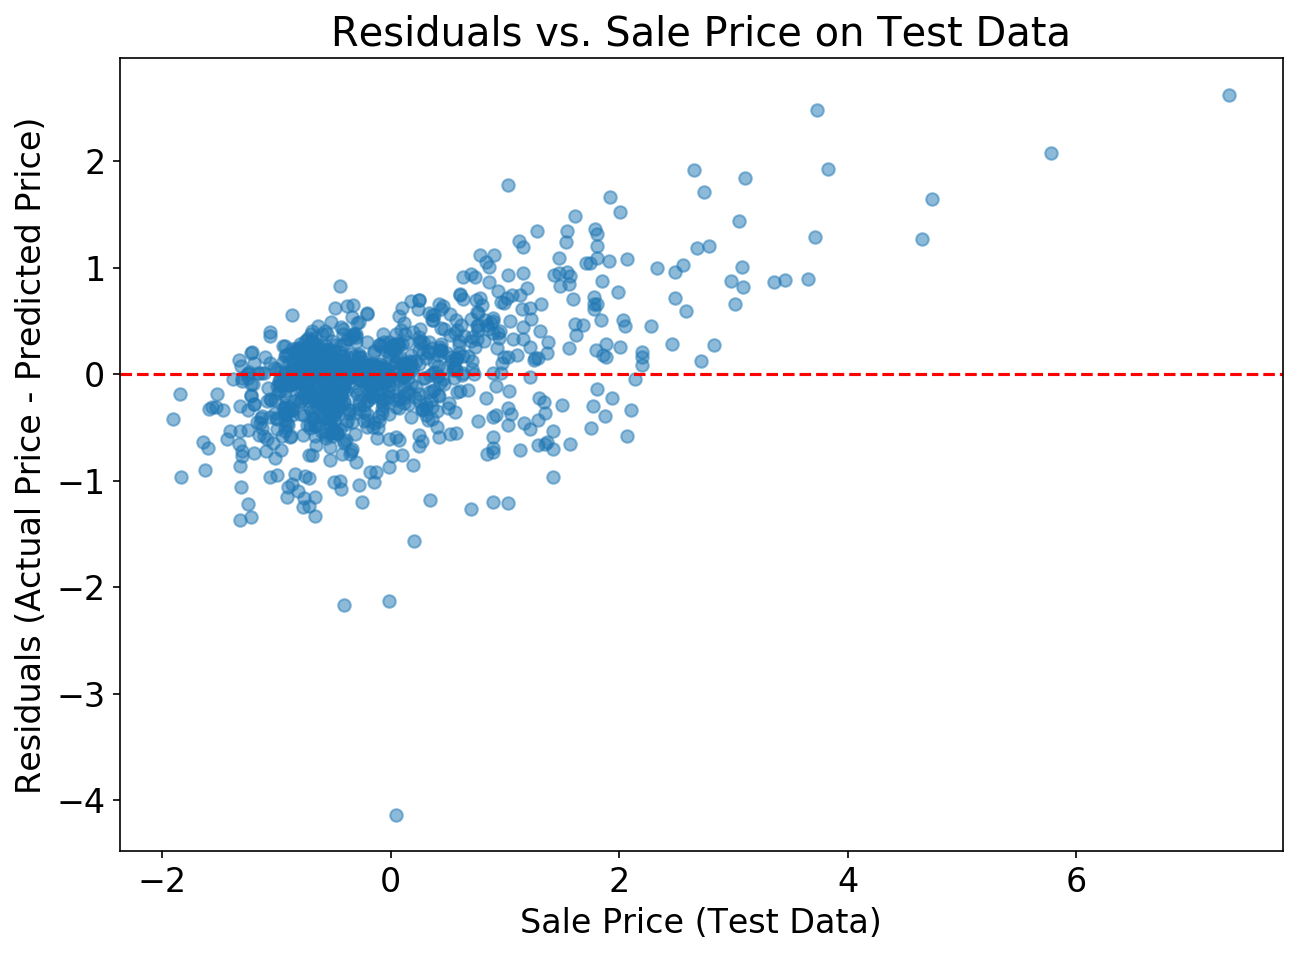

In [54]:
# RUN

residuals = y_test - y_predict

plt.axhline(y = 0, color = "red", linestyle = "dashed")
plt.scatter(y_test, residuals, alpha=0.5);

plt.xlabel('Sale Price (Test Data)')
plt.ylabel('Residuals (Actual Price - Predicted Price)')
plt.title("Residuals vs. Sale Price on Test Data")

q8b_gca = plt.gca();  

In [55]:
# TEST 

assert "q8b_gca" in locals()
assert set(y_test) == set(dsua_112_utils.get_scatter(q8b_gca)[:,0])


#### Question 8c : Next Steps

We want the residuals to be close to zero. Moreover, we do not want a pattern in the scatter-plot. 

However the most expensive homes are always more expensive than our prediction. 

What changes could you make to your linear model to improve its accuracy and lower the test error? Suggest at least two things you could try in the cell below, and carefully explain how each change could potentially improve your model's accuracy.

- We could use a Lasso Regression instead of a ridge, the lasso regression will remove attributes that don't help with predictions. Less attributes will prevent overfitting which increases the accuracy of the training data but may hurt the test data.
- We could standardize all of the units in the data set to put them all on the same scale which should allow for less variability in the regression to find the parameters.